**Diabetes prediction using machine learningmodel**

**Import libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean
from IPython.display import Markdown as md
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

%matplotlib inline
pd.set_option('float_format', '{:f}'.format)

**Import dataset into pandas dataframe**

In [5]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Exploration**

**Feature extraction**

In [6]:
features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [7]:
for feature in features:
    df.loc[df[feature] < 0, feature] = 0

In [8]:
df.where( df < 0).count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.loc[df['Insulin'] > 300].Insulin.count()

37

In [10]:
df.loc[df.Insulin > 300, 'Insulin'] = 300

In [11]:
df.loc[df.Insulin > 300, 'Insulin'] = 300

In [12]:
df.loc[df['Insulin'] > 300].Insulin.count()

0

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,72.808594,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,91.422190,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,300.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.078238,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.310483,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.102255,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.488233,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.078238,0.310483,0.102255,0.488233,1.000000,0.209097,0.187342,-0.068803,0.123468
BMI,0.017683,0.221071,0.281805,0.392573,0.209097,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.187342,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.068803,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.123468,0.292695,0.173844,0.238356,1.000000


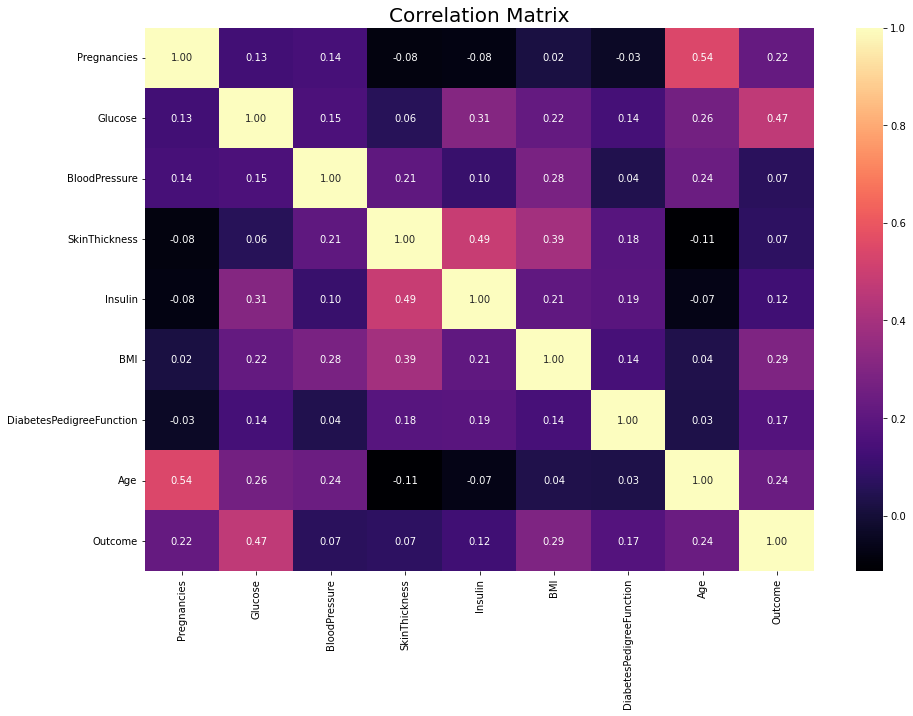

In [15]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

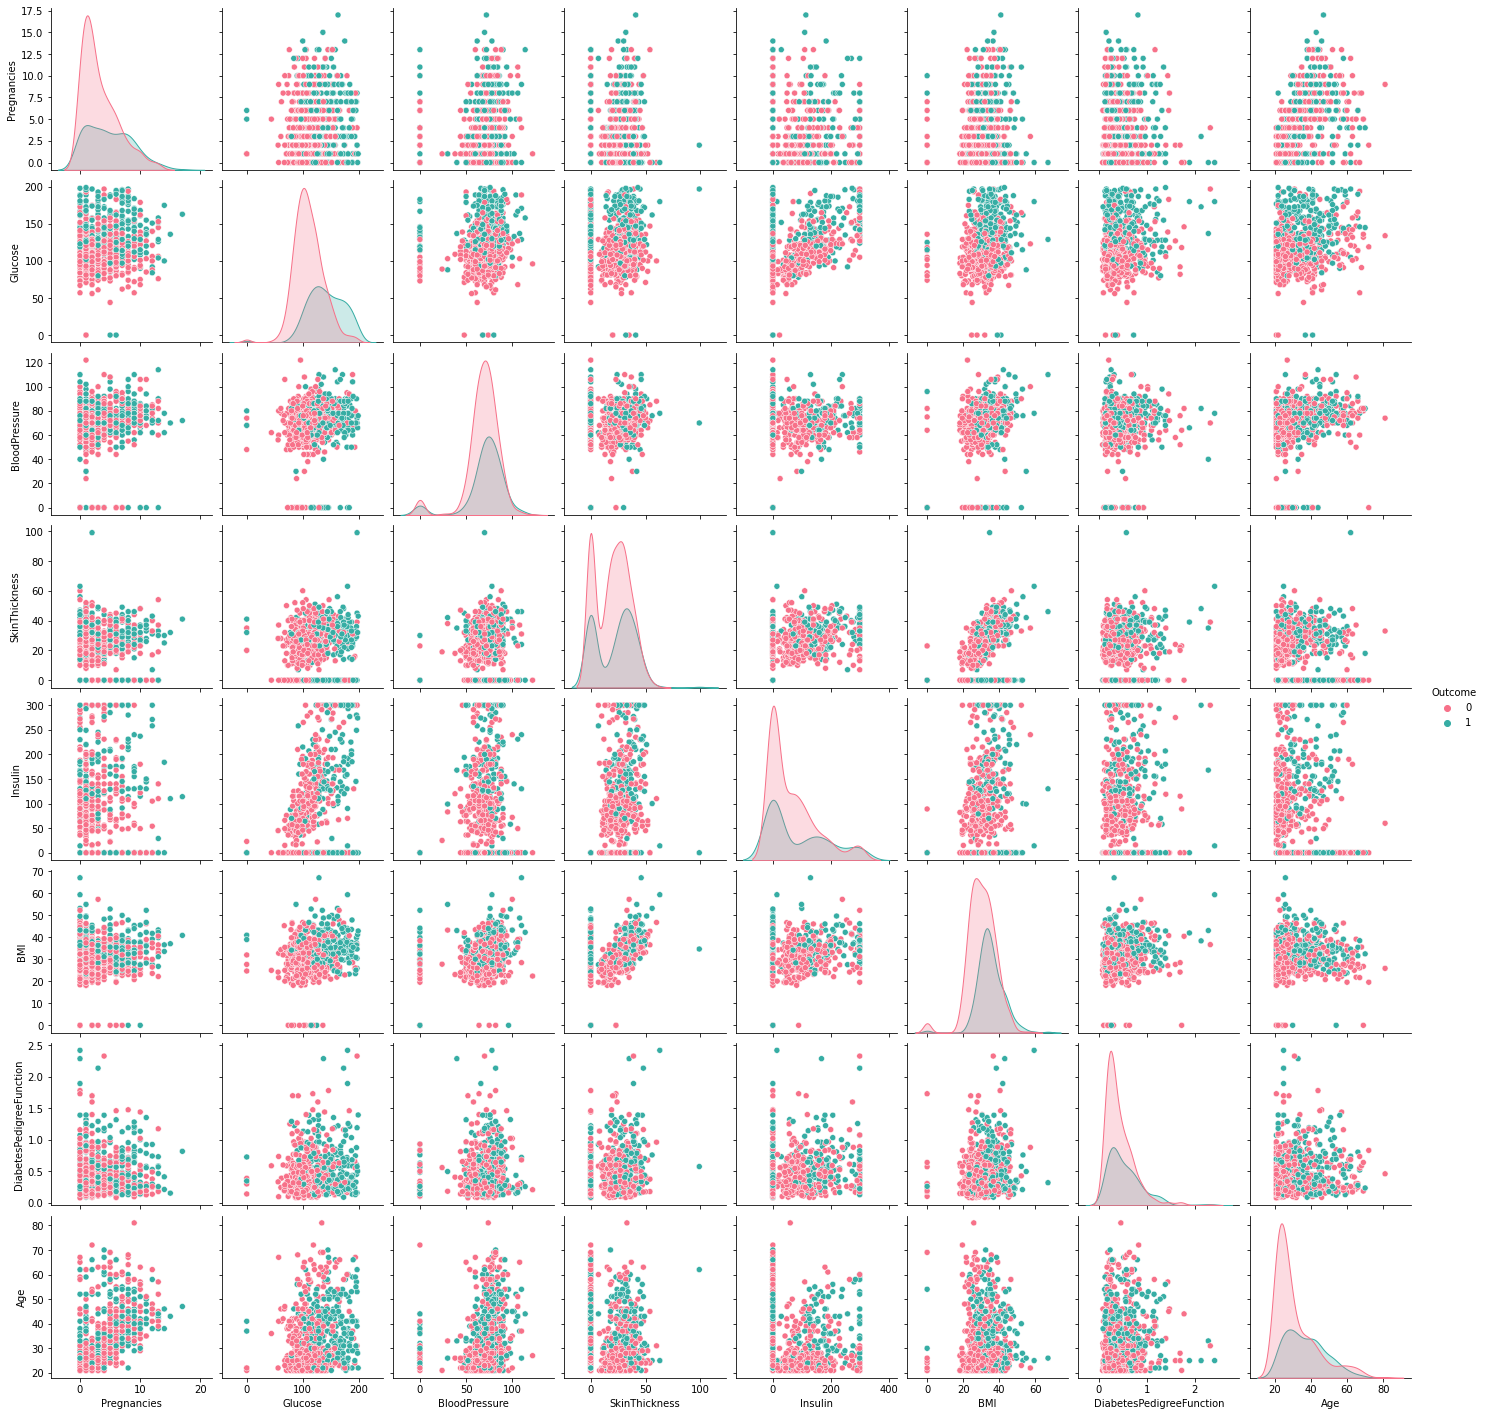

In [16]:
 g = sns.pairplot(df, hue="Outcome", palette="husl")

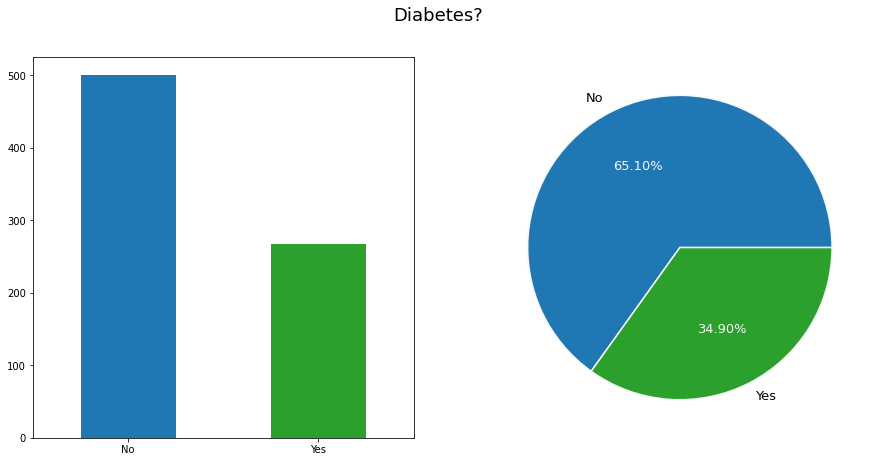

In [17]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")


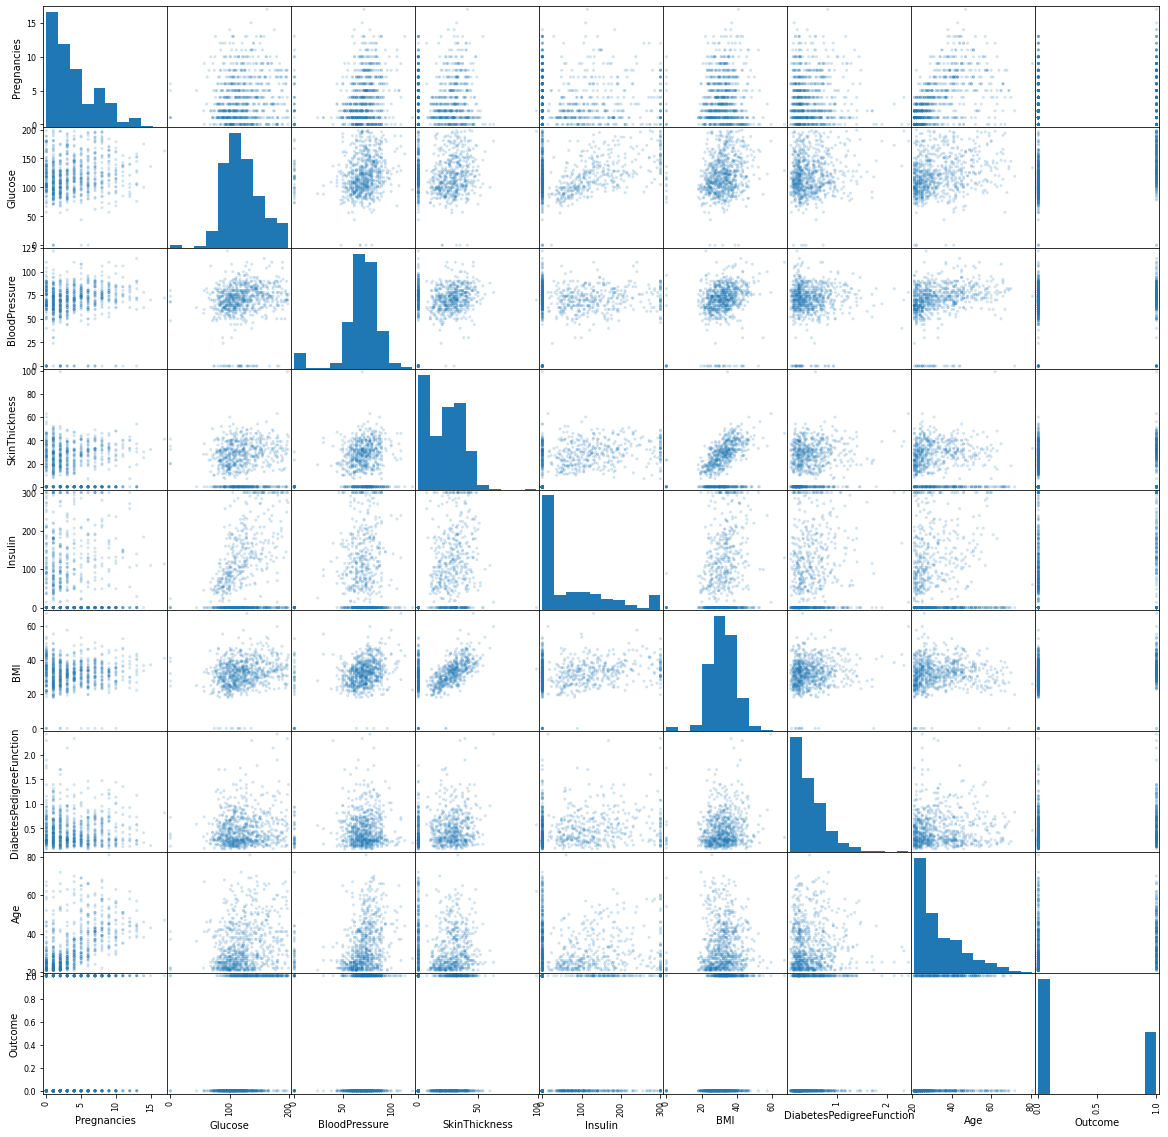

In [18]:
plot = scatter_matrix(df, alpha=0.2, figsize=(20, 20))

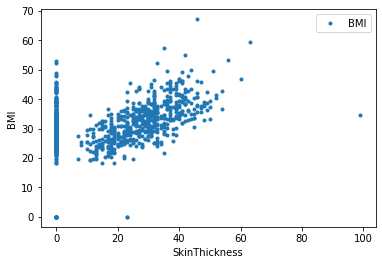

In [19]:
plot = df.plot(x='SkinThickness', y='BMI', style='.')
y_label = plot.set_ylabel('BMI')

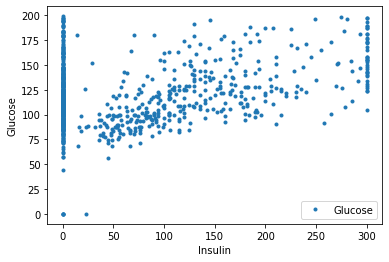

In [22]:
plot = df.plot(x='Insulin', y='Glucose', style='.')
y_label = plot.set_ylabel('Glucose')

In [23]:
for feature in features:
    df[feature] = (df[feature] - df[feature].mean())/(df[feature].std())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.348958
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.476951
min,-1.141108,-3.781190,-3.570271,-1.287373,-0.796400,-4.057829,-1.188778,-1.040871,0.000000
25%,-0.844335,-0.684790,-0.367098,-1.287373,-0.796400,-0.595191,-0.688520,-0.785774,0.000000
50%,-0.250789,-0.121808,0.149543,0.154433,-0.462783,0.000941,-0.299933,-0.360612,0.000000
75%,0.639530,0.605376,0.562856,0.718617,0.595494,0.584390,0.465923,0.659776,1.000000
max,3.904034,2.442886,2.732747,4.918660,2.485079,4.452906,5.879733,4.061069,1.000000


**Model Building**

In [26]:
#helper function for plotting rocCurve

def plotRoc_curves(fpr, tpr, thresholds):
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='seagreen', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [27]:
X = df.drop(["Outcome"], axis =1)
y = df['Outcome']

In [28]:
#Split dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

**1. Logistic Regression**

Accuracy: 0.7987012987012987
Precision: 0.7446808510638298
Recall: 0.6481481481481481


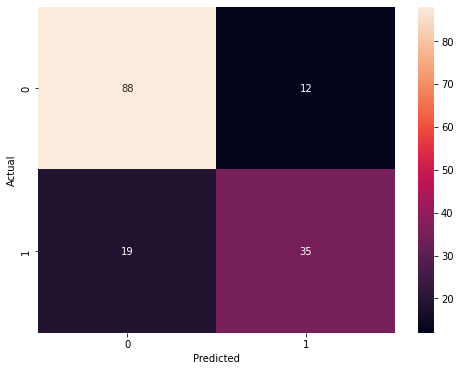

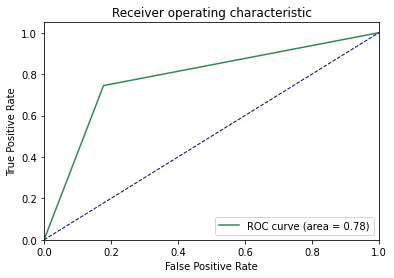

In [29]:

################## Logistic Model ###########################
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

#predicting
y_pred_lr=lr_model.predict(X_test)

#confusion matrix for both data
cnf_lr = confusion_matrix(y_test, y_pred_lr)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_lr, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for Logistic model
print("Accuracy:",accuracy_score(y_test, y_pred_lr))
print("Precision:",precision_score(y_test, y_pred_lr))
print("Recall:",recall_score(y_test, y_pred_lr))
fpr, tpr, thresholds = roc_curve(y_pred_lr, y_test)
plotRoc_curves(fpr, tpr, thresholds)

**2.KNN**

Accuracy: 0.7272727272727273
Precision: 0.65
Recall: 0.48148148148148145


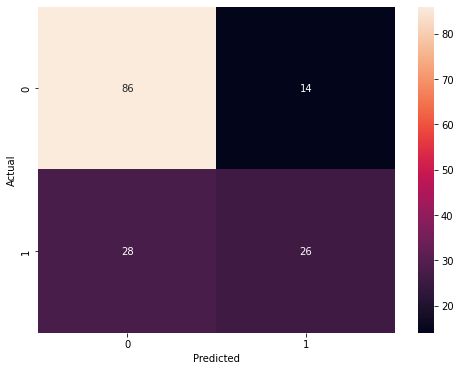

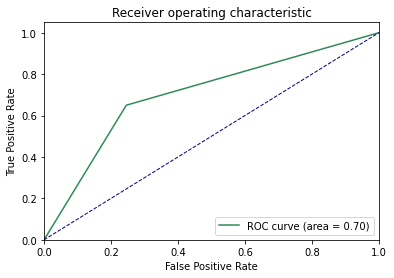

In [30]:
################## KNN Model ###########################
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

#predicting
y_pred_knn=knn_model.predict(X_test)

#confusion matrix for both data
cnf_knn = confusion_matrix(y_test, y_pred_knn)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_knn, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for KNN
print("Accuracy:",accuracy_score(y_test, y_pred_knn))
print("Precision:",precision_score(y_test, y_pred_knn))
print("Recall:",recall_score(y_test, y_pred_knn))
fpr, tpr, thresholds = roc_curve(y_pred_knn, y_test)
plotRoc_curves(fpr, tpr, thresholds)

**Hyperparameter tuning for KNN model**

In [31]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [32]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 17}

In [33]:
knn_gscv.best_score_


0.777404295051354

**3. SVM**

Accuracy: 0.7662337662337663
Precision: 0.7045454545454546
Recall: 0.5740740740740741


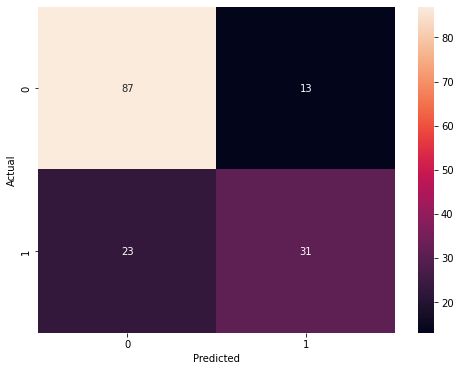

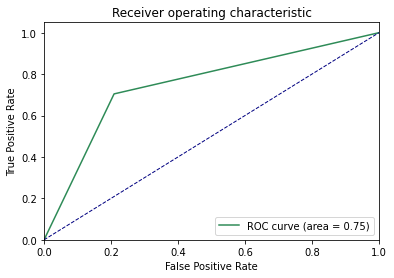

In [34]:

################## SVM Model ###########################
svc_model=SVC()
svc_model.fit(X_train,y_train)

#predicting
y_pred_svm=svc_model.predict(X_test)

#confusion matrix for both data
cnf_svm = confusion_matrix(y_test, y_pred_svm)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_svm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for SVM
print("Accuracy:",accuracy_score(y_test, y_pred_svm))
print("Precision:",precision_score(y_test, y_pred_svm))
print("Recall:",recall_score(y_test, y_pred_svm))
fpr, tpr, thresholds = roc_curve(y_pred_svm, y_test)
plotRoc_curves(fpr, tpr, thresholds)

**Hyperparameter tuning for SVM model**

In [35]:
#From sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

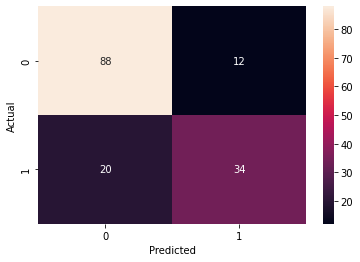

In [36]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svc_model, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test_scaled)

#confusion matrix for both data
cnf_svm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6,4))
fig = sn.heatmap(cnf_svm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for SVM
print("Accuracy:",accuracy_score(y_test,grid_predictions))
print("Precision:",precision_score(y_test, grid_predictions))
print("Recall:",recall_score(y_test, grid_predictions))


**4. Decision classifier**

Accuracy: 0.7142857142857143
Precision: 0.5925925925925926
Recall: 0.48148148148148145


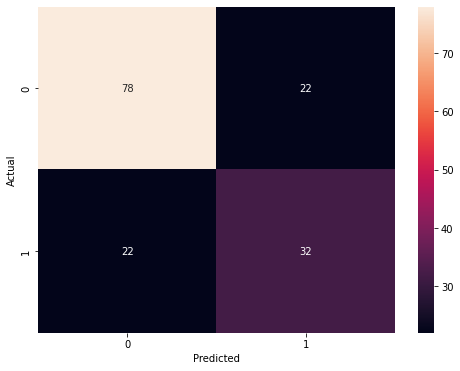

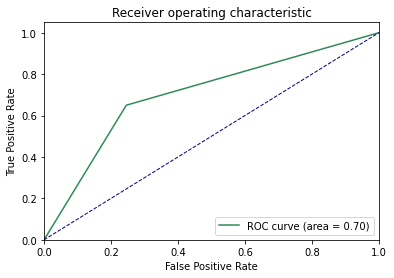

In [37]:
################## Decision tree Model ###########################
dec_model=DecisionTreeClassifier()
dec_model.fit(X_train,y_train)

#predicting
y_pred_dec=dec_model.predict(X_test)

#confusion matrix for both data
cnf_dec = confusion_matrix(y_test, y_pred_dec)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_dec, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for decision tree model
print("Accuracy:",accuracy_score(y_test, y_pred_dec))
print("Precision:",precision_score(y_test, y_pred_dec))
print("Recall:",recall_score(y_test, y_pred_knn))
fpr, tpr, thresholds = roc_curve(y_pred_knn, y_test)
plotRoc_curves(fpr, tpr, thresholds)


**Hyperparameter tuning for decision tree model**

Accuracy: 0.7532467532467533
Precision: 0.6379310344827587
Recall: 0.6851851851851852


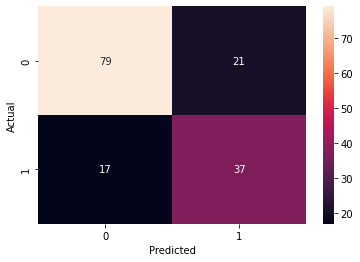

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)
DT = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8)
DT.fit(X_train, y_train)
#predicting
y_pred_DT=DT.predict(X_test)
#confusion matrix for both data
cnf_DT= confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(6,4))
fig = sn.heatmap(cnf_DT, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


#Accurary , pre and recall for DT
print("Accuracy:",accuracy_score(y_test, y_pred_DT))
print("Precision:",precision_score(y_test, y_pred_DT))
print("Recall:",recall_score(y_test, y_pred_DT))


**5. Random forest classifier**

Accuracy: 0.7922077922077922
Precision: 0.7037037037037037
Recall: 0.7037037037037037


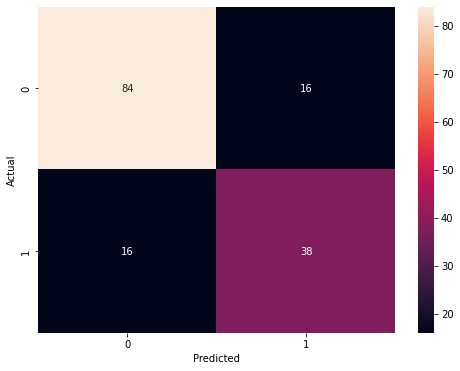

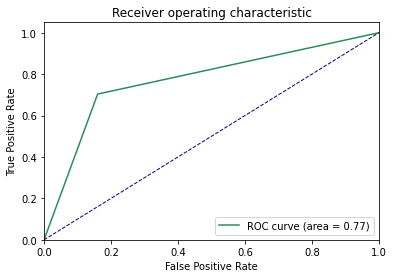

In [39]:

################## Random forest tree Model ###########################
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

#predicting
y_pred_rf=rf_model.predict(X_test)

#confusion matrix for both data
cnf_rf = confusion_matrix(y_test, y_pred_rf)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_rf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for random forest tree model
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Precision:",precision_score(y_test, y_pred_rf))
print("Recall:",recall_score(y_test, y_pred_rf))
fpr, tpr, thresholds = roc_curve(y_pred_rf, y_test)
plotRoc_curves(fpr, tpr, thresholds)

**6. XGBoost**

Accuracy: 0.8051948051948052
Precision: 0.74
Recall: 0.6851851851851852


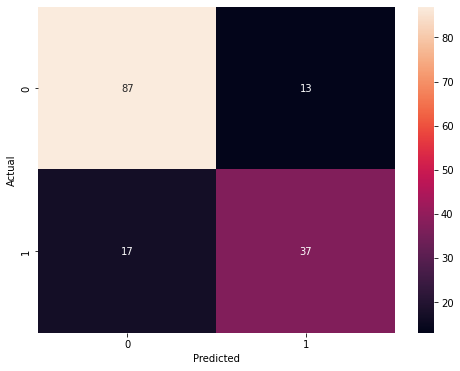

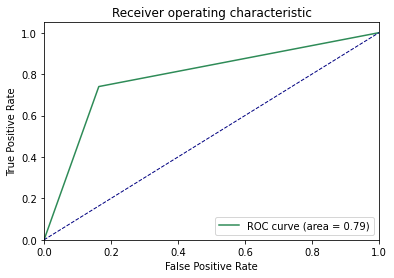

In [40]:

################## XGBoost Model ###########################
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

#predicting
y_pred_xgb=xgb_model.predict(X_test)

#confusion matrix for both data
cnf_xgb = confusion_matrix(y_test, y_pred_xgb)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_xgb, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
 
#Accurary , pre and recall for XGBoost model
print("Accuracy:",accuracy_score(y_test, y_pred_xgb))
print("Precision:",precision_score(y_test, y_pred_xgb))
print("Recall:",recall_score(y_test, y_pred_xgb))
fpr, tpr, thresholds = roc_curve(y_pred_xgb, y_test)
plotRoc_curves(fpr, tpr, thresholds)

**Hyperparameter tuning for XGBoost model**

In [41]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)


In [42]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}


In [43]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)


In [44]:
grid_search.fit(X, y)


Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [45]:
grid_search.best_estimator_

XGBClassifier(max_depth=2, n_estimators=140, nthread=4, seed=42)

**6.LGBM Classifier**

Accuracy: 0.7857142857142857
Precision: 0.6981132075471698
Recall: 0.6851851851851852


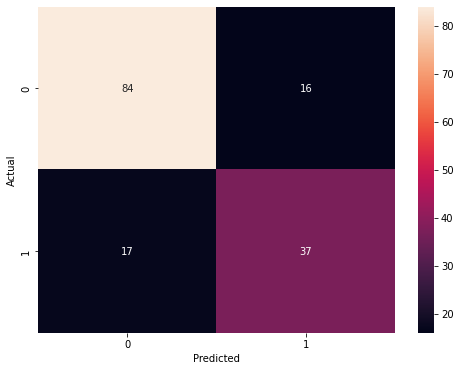

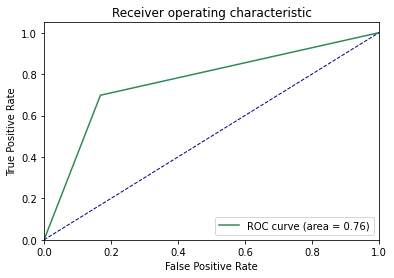

In [46]:

################## LGBM Model ###########################
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)

#predicting
y_pred_lgbm=lgbm_model.predict(X_test)

#confusion matrix for both data
cnf_lgbm = confusion_matrix(y_test, y_pred_lgbm)
import seaborn as sn
plt.figure(figsize=(8,6))
fig = sn.heatmap(cnf_lgbm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Accurary , pre and recall for LGBM model
print("Accuracy:",accuracy_score(y_test, y_pred_lgbm))
print("Precision:",precision_score(y_test, y_pred_lgbm))
print("Recall:",recall_score(y_test, y_pred_lgbm))
fpr, tpr, thresholds = roc_curve(y_pred_lgbm, y_test)
plotRoc_curves(fpr, tpr, thresholds)


In [50]:
print("Model\t\t\t Accuracy")
print("Logistic Regression\t",accuracy_score(y_test, y_pred_lr))
print("KNN\t\t\t",accuracy_score(y_test, y_pred_knn))
print("SVM\t\t\t",accuracy_score(y_test, y_pred_svm))
print("Decision Classifier\t",accuracy_score(y_test, y_pred_dec))
print("Random forest Classifier",accuracy_score(y_test, y_pred_rf))
print("XGBoost Classifier\t",accuracy_score(y_test, y_pred_xgb))
print("LGBM Classifier\t\t",accuracy_score(y_test, y_pred_lgbm))

Model			 Accuracy
Logistic Regression	 0.7987012987012987
KNN			 0.7272727272727273
SVM			 0.7662337662337663
Decision Classifier	 0.7142857142857143
Random forest Classifier 0.7922077922077922
XGBoost Classifier	 0.8051948051948052
LGBM Classifier		 0.7857142857142857


**Conclusion:**After analysing all the 7 models,we found XGBoost is the best model for this dataset.